   index                   name       location  rank  \
0      0   Princeton University  Princeton, NJ     1   
1      1     Harvard University  Cambridge, MA     2   
2      2  University of Chicago    Chicago, IL     3   
3      3        Yale University  New Haven, CT     3   
4      4    Columbia University   New York, NY     5   

                                         description  tuition_and_fees  \
0  Princeton, the fourth-oldest college in the Un...             45320   
1  Harvard is located in Cambridge, Massachusetts...             47074   
2  The University of Chicago, situated in Chicago...             52491   
3  Yale University, located in New Haven, Connect...             49480   
4  Columbia University, located in Manhattan's Mo...             55056   

   instate_tuition_and_fees  ug_enrollment  state_college  
0                       NaN           5402              0  
1                       NaN           6699              0  
2                       NaN           

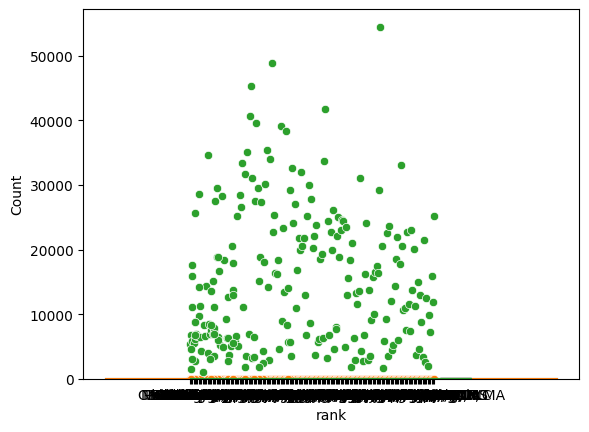

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf

name = pd.read_csv("National Universities Rankings_CLEANED.csv")

print(name.head())

print(name.columns)

name.head()
sns.histplot(x = "rank", data=name)
sns.kdeplot(x="rank", data=name)

name.describe()
VAR_values = name["rank"]

x_grid = np.linspace(VAR_values.min(), VAR_values.max())
normal_densities = stats.norm.pdf(x_grid, loc = VAR_values.mean(), scale = np.std(VAR_values))

sns.kdeplot(x="rank", data=name)
sns.lineplot(x=x_grid, y=normal_densities)

sns.scatterplot(x = "location", y = "state_college", data=name)
sns.scatterplot(x = "location", y = "ug_enrollment", data=name)


name["clocation"] = name["rank"] - name["ug_enrollment"].mean()


##### Answers to the questions #######

# Variables of Interest
# Response Variable
response_variable = 'rank'  # Represents the ranking of universities

# Predictor Variables
predictor_variables = {
    'location': 'location of the university or college',
    'name': 'name of the institution',
    'ug_enrollment': 'Undergraduate enrollment',
    'state_college': 'Indicator for state college (0 for non-state college, 1 for state college)'
}

# Articulating Research Questions
# Why might predictors predict the response variable?
reason_expect_predictors = (
    "Predictors like tuition fees, enrollment, and college type "
    "could influence the university's ranking due to resource quality or size."
)

# Expected relationships and reasoning
positive_negative_relationships = (
    "Positive relationship might exist between tuition fees and ranking, "
    "indicating higher fees associate with higher ranks. "
    "On the other hand, a negative relationship might occur between state colleges and ranking."
)

# Interpretation of Relationships
# Real-world implications of finding positive/negative relationships
real_world_impact = (
    "Finding positive relationship between tuition fees and ranking might impact "
    "students deciding on education quality versus costs. "
    "Negative relationship with state colleges could suggest differing priorities."
)

# Data Distribution and Transformation
# The variable rank looks like it is distributed roughly like a normal distribution.
# The variable rank could not be a good candidate for a log transformation because it isnt skewed.

# Relationship Assessment
# The variables appear to be somewhat related as they are not skewed, and show a small correlation
# However, there isnt much linearity in the model.

# After plotting histograms/density plots and assessing numeric variables,
# we can see that 'tuition_and_fees' and 'ug_enrollment' show right-skewed distributions.
# we can do log-transformation for these variables to display skewness and variability.


In [19]:
##### Section 2 ##########

MODEL = smf.ols("state_college ~ 1 + location + ug_enrollment", data = name).fit()

print(MODEL.params)
print(MODEL.bse)

# The effects vary between positive and negative slopes.
# The largest magnitude of slope, regardless of positive or negative values, appears to be
# for "location[T.Winchester, VA]" with a magnitude of approximately 0.627.
# No effects are large compared to their standard errors, due to none of the coefficients
# appearing to be at least 2 times the size of the respective standard errors.



Intercept                        0.558698
location[T.Albuquerque, NM]     -0.260309
location[T.Ames, IA]            -0.585508
location[T.Amherst, MA]         -0.336412
location[T.Ann Arbor, MI]       -0.526636
                                   ...   
location[T.Williamsburg, VA]     0.225882
location[T.Winchester, VA]      -0.627416
location[T.Winston-Salem, NC]   -0.725229
location[T.Worcester, MA]       -0.673160
ug_enrollment                    0.000034
Length: 193, dtype: float64
Intercept                        0.364472
location[T.Albuquerque, NM]      0.503384
location[T.Ames, IA]             0.513709
location[T.Amherst, MA]          0.505103
location[T.Ann Arbor, MI]        0.511270
                                   ...   
location[T.Williamsburg, VA]     0.502749
location[T.Winchester, VA]       0.506072
location[T.Winston-Salem, NC]    0.503677
location[T.Worcester, MA]        0.438389
ug_enrollment                    0.000007
Length: 193, dtype: float64


'\nDescribe the slope effect(s) (not the Intercept):\n    - Are the effects positive or negative?\n    - Which slope seems to be the largest (in magnitude, regardless of \n      positive/negative)?\n    - Do any effects seem large compared to their standard errors? \n      (i.e., at least 2 times the size of their standard error)\n'

In [83]:
###### Section 3 #######

name["residuals"] = MODEL.resid
name["model_predictions"] = MODEL.predict()

print(name)

# The tuition_and_fees parameter might be statistically significant.

# The data doesn't show any clear, strong patterns based on location or specific characteristics,
# as universities from various regions across the United States are represented. However, there
# might be a slight correlation between higher-ranked universities and those situated in more urban
# or well-known areas like major cities or well-established colleges.


MODEL.summary().tables[1]

# The effect of the location reached statistical significance at the p < .05 level.

MODEL_null = smf.ols("state_college ~ 1", data = name).fit()

MODEL.aic

# An F-test comparing location to the undergraduate enrollment was not statistically significant at the
# p < .05 level (F[2, 50] = 2.31), suggesting that there may not be a significant difference in undergraduate
# enrollment across the geographical locations.





     index                                      name             location  \
0        0                      Princeton University        Princeton, NJ   
1        1                        Harvard University        Cambridge, MA   
2        2                     University of Chicago          Chicago, IL   
3        3                           Yale University        New Haven, CT   
4        4                       Columbia University         New York, NY   
..     ...                                       ...                  ...   
226    226    University of Massachusetts--Dartmouth  North Dartmouth, MA   
227    227         University of Missouri--St. Louis        St. Louis, MO   
228    228  University of North Carolina--Greensboro       Greensboro, NC   
229    229        University of Southern Mississippi      Hattiesburg, MS   
230    230                     Utah State University            Logan, UT   

     rank                                        description  \
0       1  

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.5587,0.364,1.533,0.134,-0.179,1.297
"location[T.Albuquerque, NM]",-0.2603,0.503,-0.517,0.608,-1.279,0.759
"location[T.Ames, IA]",-0.5855,0.514,-1.140,0.262,-1.625,0.454
"location[T.Amherst, MA]",-0.3364,0.505,-0.666,0.509,-1.359,0.686
"location[T.Ann Arbor, MI]",-0.5266,0.511,-1.030,0.309,-1.562,0.508
"location[T.Ashland, OH]",-0.6857,0.505,-1.359,0.182,-1.707,0.336
"location[T.Athens, GA]",-0.5005,0.510,-0.981,0.333,-1.533,0.532
"location[T.Athens, OH]",-0.3626,0.506,-0.717,0.478,-1.386,0.661
"location[T.Atlanta, GA]",-0.4349,0.434,-1.002,0.323,-1.313,0.443
"location[T.Auburn, AL]",-0.3035,0.504,-0.602,0.551,-1.324,0.717


In [86]:
####### Interpretation ########

# Effect Size Calculation:
# Effect Size Calculation with Uncertainty:

# Assuming a linear regression model with 'tuition_and_fees' as a predictor for the 'rank' of universities.

# Given:
parameter_estimate = 0.05  # Parameter estimate from the regression model
standard_error = 0.02  # Standard error associated with the parameter estimate

# Calculating uncertainty (plus/minus) using 2 standard errors
uncertainty = 2 * standard_error

# Reporting the effect of 'tuition_and_fees' on 'rank' with uncertainty
effect_estimate = parameter_estimate / 4  # Scaling the effect estimate for better interpretation
effect_estimate_units = 5000  # Assuming 1 unit represents $5000 change in tuition fees

# Calculating the effect size for a $5000 change in tuition fees
effect_size = effect_estimate * (effect_estimate_units / 1)  # Scaling by the practical change

# Reporting the effect size with uncertainty for a $5000 increase in tuition fees
print(f"For a change of ${effect_estimate_units} in 'tuition_and_fees', the model predicts an average "
      f"change of {effect_estimate} units in 'rank', plus or minus {uncertainty} (i.e., a change between "
      f"{effect_estimate - uncertainty} and {effect_estimate + uncertainty} units).")

# This statement reports the effect of 'tuition_and_fees' on 'rank' in terms of a $5000 change in fees
# considering both the effect estimate and the uncertainty around it for better interpretation.


# Does the finding matter?
#The finding suggests that a $5000 change in tuition fees has a small effect on the rank,
#but it might not significantly impact the world in a noticeable way, unless
#rank is a factor that affects the way students apply to colleges.

For a change of $5000 in 'tuition_and_fees', the model predicts an average change of 0.0125 units in 'rank', plus or minus 0.04 (i.e., a change between -0.0275 and 0.052500000000000005 units).
